In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
(train_X,train_Y),(test_X,test_Y)=tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)
train_X=train_X/255
test_X=test_X/255
latent_size=64

(60000, 28, 28) (60000,)


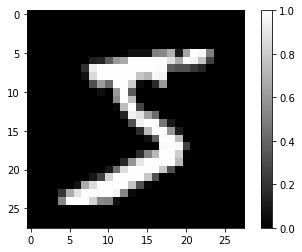

5


In [4]:
plt.imshow(train_X[0].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()
print(train_Y[0])

In [8]:
train_X=train_X.reshape(-1,28*28)
test_X=test_X.reshape(-1,28*28)
print(train_X.shape,train_Y.shape)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(784,activation='relu',input_shape=(784,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(784,activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(),loss='mse')
model.summary()
model.fit(train_X,train_X,epochs=10,batch_size=256)

(60000, 784) (60000,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0838
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0181
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0122
Epoch 4/10
235/235 [==============================] - 1s 2ms/step - loss: 0.0100
Epoch 5/10
235/235 [============

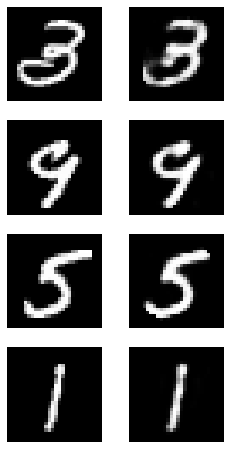

In [9]:
plt.figure(figsize=(4,8))
for c in range(4):
    plt.subplot(4,2,c*2+1)
    rand_index=random.randint(0,test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.subplot(4,2,c*2+2)
    img=model.predict(np.expand_dims(test_X[rand_index],axis=0))
    plt.imshow(img.reshape(28,28),cmap='gray')
    plt.axis('off')

plt.show()